**I have used sources like youtube for this project and also chatgpt for rectifying some functions**

In [1]:
pip install tensorflow-gpu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


Requested tensorflow-gpu from https://files.pythonhosted.org/packages/8a/45/fa31ced1db38f9424f262dfbf35747fe5378b5c808cecb373c8cb8e515d3/tensorflow-gpu-2.12.0.tar.gz has invalid metadata: Expected end or semicolon (after name and no valid version specifier)
    python_version>"3.7"
                  ^
Please use pip<24.1 if you need to use this version.
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu


**I am making this project using an youtube channel**

In [2]:
import librosa
import os 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf 
import tensorflow_io as tfio

In [3]:
#Loading the dataset
capuchin_file = os.path.join('data','Parsed_Capuchinbird_Clips','XC3776-3.wav')


In [4]:
not_capuchin_bird = os.path.join('data','Parsed_Not_Capuchinbird_Clips','afternoon-birds-song-in-forest-0.wav')

In [5]:
capuchin_file

'data\\Parsed_Capuchinbird_Clips\\XC3776-3.wav'

In [6]:
not_capuchin_bird

'data\\Parsed_Not_Capuchinbird_Clips\\afternoon-birds-song-in-forest-0.wav'

**We have succesfully loaded the dataset**

In [7]:
# def load_wav_16k_mono(filename):
#     file_contents = tf.io.read_file(filename)
#     wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels =1)
#     wav = tf.squeeze(wav, axis =-1)
#     sample_rate = tf.cast(sample_rate, dtype=tf.int64)
#     wav = tfio.audio.resample(wav,rate_in = sample_rate, rate_out = 16000)
#     return wav

# def load_wav_16k_mono(filename):
#     # Load the audio file with librosa (resampling to 16 kHz and mono by default)
#     wav, sample_rate = librosa.load(filename, sr=16000, mono=True)
    
#     # Convert the numpy array back to a TensorFlow tensor
#     wav_tensor = tf.convert_to_tensor(wav, dtype=tf.float32)
    
#     return wav_tensor

def load_wav_16k_mono(filename):
    # Define a wrapper function for librosa.load that can handle the file path
    def _load_and_resample(filename):
        # Decode TensorFlow tensor filename to a regular string
        filename = filename.numpy().decode('utf-8')
        
        # Load the audio file with librosa and resample to 16kHz, mono
        wav, sample_rate = librosa.load(filename, sr=16000, mono=True)
        return wav
    
    # Use tf.py_function to wrap the librosa code in eager execution mode
    wav = tf.py_function(_load_and_resample, [filename], tf.float32)
    
    # Set the shape of the output tensor (audio waveform)
    wav.set_shape([None])  # None means variable length of the waveform
    
    return wav

In [8]:
#This is just a way how the function works for better understanding in case you comeback to read this code
file_contents = tf.io.read_file(capuchin_file)

In [9]:
file_contents
#we got our audio in the string format

<tf.Tensor: shape=(), dtype=string, numpy=b'RIFF\xbc\t\x04\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00data\x98\t\x04\x00\xc5\xf1(\xfb\x7f\x07F\x13|\x1c\xa3$\x07.R8\x03A\xbaF\xb6J\xb4NQR\x92S\x95Q\xa1M/I\xb3CJ;\x88/\xa2"X\x17\x12\x0e\xce\x04\xdd\xf9\x07\xeei\xe3\xc3\xda\xa5\xd2\xae\xc9\xc4\xc0P\xbaB\xb7\xb5\xb5-\xb3\xaa\xaf\xad\xad\x00\xafd\xb22\xb5\xeb\xb6\xf5\xb9m\xc0\x1e\xc9\xc6\xd0-\xd6\xba\xdbO\xe4[\xefG\xf9\xd2\xff\xc3\x04\x87\x0b\xec\x14m\x1e\xc6%\xc4+\xb22\xa3:\xd7@\x17C\x86B8BoC[D\xc5B\xda>\x9e:\x117\xeb2`,_#\x93\x19\x82\x10X\x08M\x00\xb2\xf7j\xee\t\xe5\xc1\xdc\xbc\xd6\xf3\xd2\xeb\xcfV\xcc\x1c\xc9\xc5\xc8b\xcc\x95\xd1\xe6\xd4\xe4\xd5\xda\xd7\xb2\xdd\x13\xe6\xf3\xec\xc8\xf0\x99\xf4\x00\xfc@\x06\xed\x0eX\x13\x94\x154\x19:\x1e!!\xcb\x1fj\x1cu\x1a\xdd\x19A\x17\xd6\x100\t\t\x04f\x01\xd3\xfd_\xf7\x84\xf0\xf7\xec\xb5\xec\x16\xec\xc1\xe8\xd8\xe4.\xe4V\xe72\xeb<\xed\xad\xeeb\xf2\xc1\xf8E\xff\x00\x04\x04\x08t\r!\x14\x83\x19\xfe\x1b\xd6\x1cJ\x1e\x

In [10]:
audio , sample_rate = tf.audio.decode_wav(file_contents)

In [11]:
audio, sample_rate #44.1Khertz we get as sample rate

(<tf.Tensor: shape=(132300, 1), dtype=float32, numpy=
 array([[-0.11117554],
        [-0.0378418 ],
        [ 0.05856323],
        ...,
        [-0.01077271],
        [-0.03436279],
        [-0.04879761]], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=44100>)

In [12]:
#44.1KHertz is too much. We need to reduce the size of our final audio

In [13]:
wave = load_wav_16k_mono(capuchin_file)
nwave = load_wav_16k_mono(not_capuchin_bird)

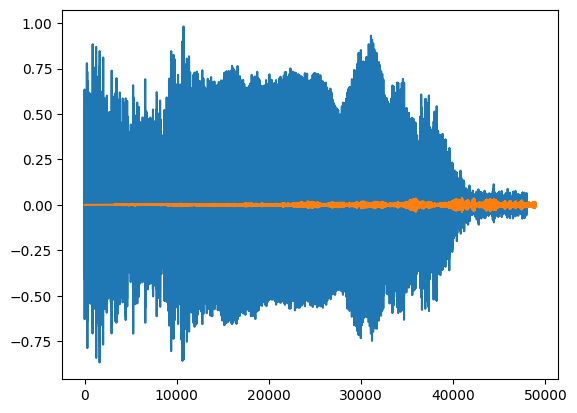

In [14]:
#We have now processed a single sample
plt.plot(wave)
plt.plot(nwave)
plt.show()

In [15]:
#Building a Spectogram
#we will bec converting it into image and then use the immage classification technique for building our model.More sepcifically the Convulutional Neural Network

In [16]:
capuchin = os.path.join('data','Parsed_Capuchinbird_Clips')
not_capuchin = os.path.join('data','Parsed_Not_Capuchinbird_Clips')

In [17]:
capuchin, not_capuchin

('data\\Parsed_Capuchinbird_Clips', 'data\\Parsed_Not_Capuchinbird_Clips')

In [18]:
#Now we will be ccreating tensorflow dataset

In [19]:
#We are creating tensor datasets.It gives us set of files as string 
cp = tf.data.Dataset.list_files(capuchin+'\*.wav')
ncp = tf.data.Dataset.list_files(not_capuchin+'\*.wav')

In [20]:
len(cp)

217

In [21]:
len(ncp)

593

In [22]:
cp.as_numpy_iterator().next()

b'data\\Parsed_Capuchinbird_Clips\\XC79965-5.wav'

In [23]:
#Uisng ones and zeros for binary classification. I am smart guys!!!!!!!!
cps = tf.data.Dataset.zip((cp, tf.data.Dataset.from_tensor_slices(tf.ones(len(cp)))))
ncps = tf.data.Dataset.zip((ncp, tf.data.Dataset.from_tensor_slices(tf.zeros(len(ncp)))))

In [24]:
cps.as_numpy_iterator().next()

(b'data\\Parsed_Capuchinbird_Clips\\XC3776-4.wav', np.float32(1.0))

In [25]:
dataset = cps.concatenate(ncps)

In [26]:
dataset.shuffle(1000).as_numpy_iterator().next()

(b'data\\Parsed_Not_Capuchinbird_Clips\\night-insect-sounds-5.wav',
 np.float32(0.0))

In [27]:
lengths = [len(load_wav_16k_mono(os.path.join('data', 'Parsed_Capuchinbird_Clips', file))) for file in os.listdir(os.path.join('data', 'Parsed_Capuchinbird_Clips'))]


In [28]:
os.listdir(os.path.join('data','Parsed_Capuchinbird_Clips'))

['XC114131-0.wav',
 'XC114131-1.wav',
 'XC114131-2.wav',
 'XC114131-3.wav',
 'XC114131-4.wav',
 'XC114132-0.wav',
 'XC114132-1.wav',
 'XC114132-2.wav',
 'XC114132-3.wav',
 'XC114132-4.wav',
 'XC114132-5.wav',
 'XC114132-6.wav',
 'XC119294-0.wav',
 'XC16803-0.wav',
 'XC16803-1.wav',
 'XC16803-2.wav',
 'XC16804-0.wav',
 'XC16804-1.wav',
 'XC168899-0.wav',
 'XC178167-0.wav',
 'XC178167-1.wav',
 'XC178167-2.wav',
 'XC178167-3.wav',
 'XC178168-0.wav',
 'XC178168-1.wav',
 'XC178168-2.wav',
 'XC178168-3.wav',
 'XC178168-4.wav',
 'XC178168-5.wav',
 'XC178168-6.wav',
 'XC178168-7.wav',
 'XC201990-0.wav',
 'XC201990-1.wav',
 'XC201990-2.wav',
 'XC201990-3.wav',
 'XC201990-4.wav',
 'XC201990-5.wav',
 'XC216010-0.wav',
 'XC216010-1.wav',
 'XC216010-2.wav',
 'XC216010-3.wav',
 'XC216010-4.wav',
 'XC216010-5.wav',
 'XC216010-6.wav',
 'XC216010-7.wav',
 'XC216012-0.wav',
 'XC216012-1.wav',
 'XC216012-10.wav',
 'XC216012-11.wav',
 'XC216012-12.wav',
 'XC216012-13.wav',
 'XC216012-14.wav',
 'XC216012-1

In [29]:
lengths  #Length of the audio

[40000,
 48000,
 56000,
 48000,
 56000,
 64000,
 64000,
 64000,
 56000,
 56000,
 48000,
 56000,
 64000,
 56000,
 40000,
 64000,
 64000,
 64000,
 64000,
 56000,
 56000,
 56000,
 56000,
 48000,
 48000,
 56000,
 56000,
 64000,
 64000,
 48000,
 56000,
 64000,
 56000,
 64000,
 32000,
 40000,
 48000,
 40000,
 56000,
 56000,
 56000,
 56000,
 48000,
 48000,
 64000,
 64000,
 48000,
 64000,
 48000,
 48000,
 40000,
 48000,
 48000,
 56000,
 56000,
 48000,
 40000,
 56000,
 48000,
 40000,
 56000,
 48000,
 48000,
 56000,
 48000,
 64000,
 64000,
 40000,
 40000,
 72000,
 56000,
 56000,
 56000,
 64000,
 56000,
 64000,
 64000,
 56000,
 56000,
 56000,
 48000,
 48000,
 48000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 56000,
 48000,
 56000,
 40000,
 64000,
 56000,
 56000,
 40000,
 64000,
 56000,
 64000,
 48000,
 64000,
 56000,
 48000,
 48000,
 48000,
 64000,
 64000,
 64000,
 48000,
 48000,
 56000,
 48000,
 64000,
 48000,
 64000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 40000,
 48000,
 48000,


In [30]:
tf.math.reduce_mean(lengths), tf.math.reduce_min(lengths) ,tf.math.reduce_max(lengths)

(<tf.Tensor: shape=(), dtype=int32, numpy=54156>,
 <tf.Tensor: shape=(), dtype=int32, numpy=32000>,
 <tf.Tensor: shape=(), dtype=int32, numpy=80000>)

In [31]:
def preprocess(file_path,label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype = tf.float32)
    wav = tf.concat([zero_padding,wav], 0)
    spectrogram = tf.signal.stft(wav,frame_length = 320,frame_step = 32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis = 2)
    return spectrogram, label

In [32]:
filepath , label = cps.shuffle(buffer_size = 10000).as_numpy_iterator().next()


In [33]:
spectrogram,label = preprocess(filepath,label)

In [34]:
spectrogram.shape

TensorShape([1491, 257, 1])

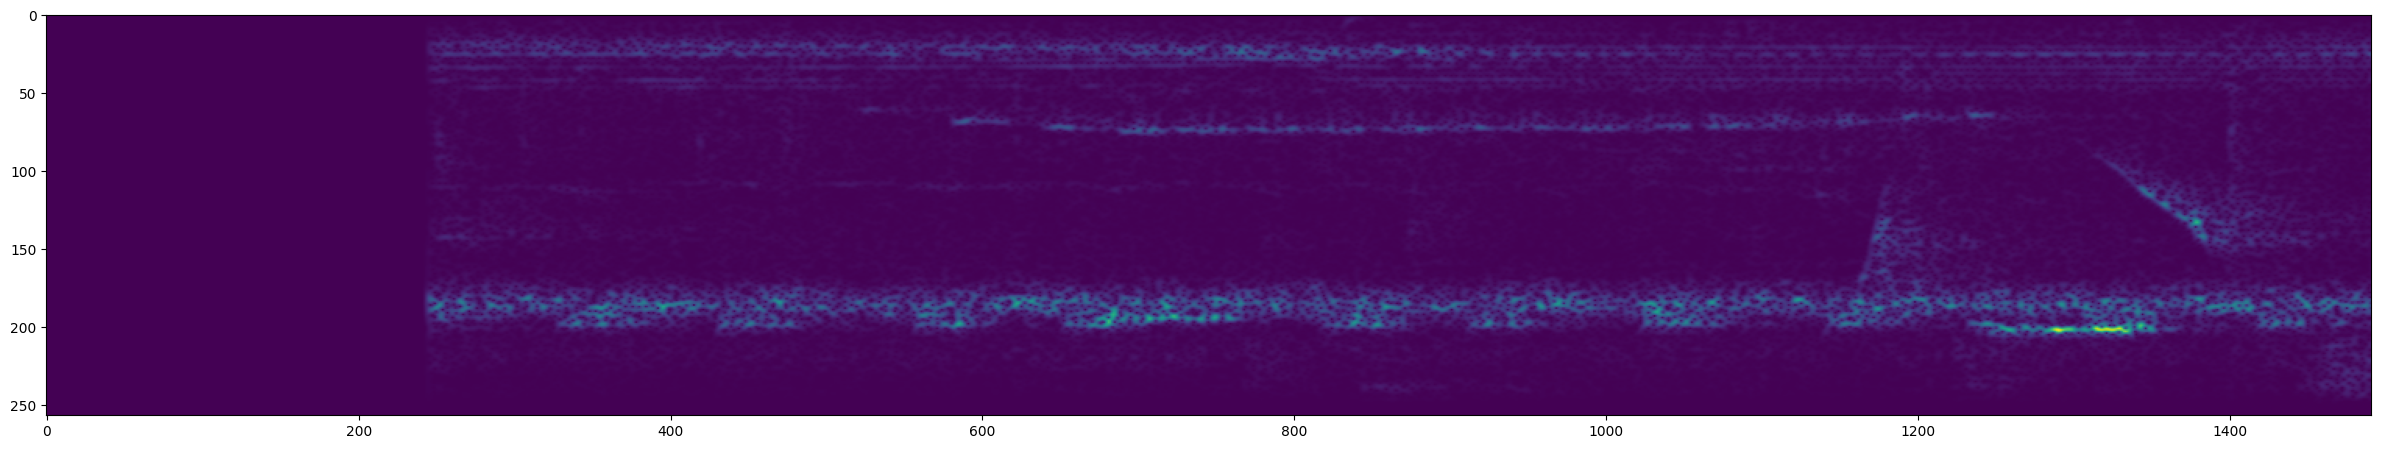

In [35]:
plt.figure(figsize = (30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [36]:
# def preprocess(file_path):
#     wav = load_wav_16k_mono(file_path)
#     return wav

dataset = dataset.map(preprocess).cache().shuffle(1000).batch(16).prefetch(8)


In [37]:
spectrogram.dtype

tf.float32

In [38]:
len(dataset)

51

In [39]:
train = dataset.take(36)
test = dataset.skip(36).take(15)

In [40]:
samples, labels = train.as_numpy_iterator().next()

In [41]:
samples.shape

(16, 1491, 257, 1)

In [42]:
labels

array([0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.],
      dtype=float32)

In [43]:
#Building our Model

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten

In [45]:
# model = Sequential()
# model.add(Conv2D(16,(3,3), activation ='relu',input_shape=(1491, 257, 1)))
# model.add(Conv2D(16,(3,3), activation ='relu'))
# model.add(Flatten())
# model.add(Dense(128,activation ='relu'))
# model.add(Dense(1,activation='sigmoid'))


from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense
from tensorflow.keras.models import Model

# # Define the input layer with the specified input shape
# input_layer = Input(shape=(1491, 257, 1))

# # Add the first convolutional layer
# conv1 = Conv2D(16, (3, 3), activation='relu')(input_layer)

# # Add the second convolutional layer
# conv2 = Conv2D(16, (3, 3), activation='relu')(conv1)

# # Flatten the output of the convolutional layers
# flatten = Flatten()(conv2)

# # Add a fully connected (dense) layer
# dense1 = Dense(128, activation='relu')(flatten)

# # Add the output layer with sigmoid activation for binary classification
# output_layer = Dense(1, activation='sigmoid')(dense1)

# # Create the model
# model = Model(inputs=input_layer, outputs=output_layer)

# # Print the model summary
# model.summary()


from tensorflow.keras.layers import GlobalAveragePooling2D
input_layer = Input(shape=(1491, 257, 1))

# Add convolutional layers
conv1 = Conv2D(16, (3, 3), activation='relu')(input_layer)
conv2 = Conv2D(16, (3, 3), activation='relu')(conv1)

# Use GlobalAveragePooling instead of Flatten
global_avg_pool = GlobalAveragePooling2D()(conv2)

# Fully connected layers
dense1 = Dense(128, activation='relu')(global_avg_pool)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1491, 257, 1)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 1489, 255, 16)       │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 1487, 253, 16)       │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 16)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,785 (18.69 KB)

 Trainable params: 4,785 (18.69 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
from tensorflow import keras
model.compile( optimizer='adam',
    loss=keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'])

In [47]:
import warnings
warnings.filterwarnings('ignore')
our_model = model.fit(train,epochs = 5,verbose = 2, validation_data = test)

Epoch 1/5
36/36 - 75s - 2s/step - accuracy: 0.7396 - loss: 0.6564 - val_accuracy: 0.8034 - val_loss: 0.5956
Epoch 2/5
36/36 - 71s - 2s/step - accuracy: 0.8247 - loss: 0.5039 - val_accuracy: 0.8504 - val_loss: 0.4161
Epoch 3/5
36/36 - 60s - 2s/step - accuracy: 0.8524 - loss: 0.3832 - val_accuracy: 0.8590 - val_loss: 0.3359
Epoch 4/5
36/36 - 62s - 2s/step - accuracy: 0.8507 - loss: 0.4025 - val_accuracy: 0.8761 - val_loss: 0.3610
Epoch 5/5
36/36 - 67s - 2s/step - accuracy: 0.8490 - loss: 0.3912 - val_accuracy: 0.8846 - val_loss: 0.3322


In [48]:
#So we have a final accuracy of 85 percent is is fairly good

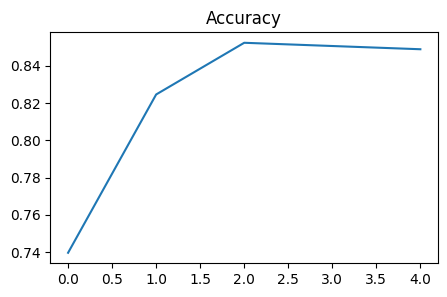

In [59]:
plt.figure(figsize=(5,3))
plt.plot(our_model.history['accuracy'])
plt.title('Accuracy')
plt.show()

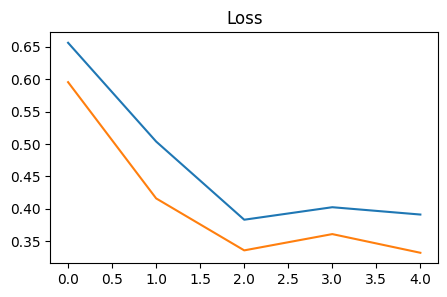

In [61]:
plt.figure(figsize=(5,3))
plt.plot(our_model.history['loss'])
plt.plot(our_model.history['val_loss'])
plt.title('Loss')
plt.show()

Now lets test our testing data

In [67]:
x_test, y_test = test.as_numpy_iterator().next()

In [75]:
x_test.shape, y_test.shape

((16, 1491, 257, 1), (16,))

In [76]:
test_ans = model.predict(test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 295ms/step


Our accuracy is close enough to our training dataset accuracy. One can say that our model is a bit overfit but not much. Plus my computer cannot hold these heavy computations right now (cry emoji :(( ). So thats why i am not doing any hyperparamter tuning

In [78]:
test_ans

array([[0.09048041],
       [0.08996349],
       [0.20446289],
       [0.30596274],
       [0.10643236],
       [0.25039038],
       [0.10387999],
       [0.09742456],
       [0.18727645],
       [0.12566243],
       [0.28110084],
       [0.107269  ],
       [0.10797889],
       [0.34357995],
       [0.11984011],
       [0.3561966 ],
       [0.11185789],
       [0.8789543 ],
       [0.15813792],
       [0.83602923],
       [0.11129101],
       [0.11399782],
       [0.10199994],
       [0.17935735],
       [0.3585003 ],
       [0.4017175 ],
       [0.21755086],
       [0.12884444],
       [0.1321869 ],
       [0.9572399 ],
       [0.13405599],
       [0.32949322],
       [0.31902218],
       [0.12891306],
       [0.8290703 ],
       [0.11600204],
       [0.09048777],
       [0.11369507],
       [0.11160324],
       [0.27122897],
       [0.39068547],
       [0.1030272 ],
       [0.10197708],
       [0.10720449],
       [0.10453579],
       [0.08998492],
       [0.10272451],
       [0.682

In [79]:
test_ans = [1 if prediction > 0.5 else 0 for prediction in test_ans]

In [80]:
test_ans

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [81]:
tf.math.reduce_sum(test_ans)

<tf.Tensor: shape=(), dtype=int32, numpy=28>

In [84]:
#for loading up mp3 files

In [89]:
# def load_mp3_16k_mono(filename):
#     res = tfio.audio.AudioIOTensor(filename)
#     tensor = res.to_tensor()
#     tensor= tf.math.reduce_sum(tensor,axis = 1)/2
#     sample_rate = res.rate
#     sample_rate = tf.cast(sample_rate,dtype = tf.int64)
#     wav = tfio.audio.resample(tensor,rate_in = sample_rate, rate_out = 16000)


# def load_mp3_16k_mono(filename):
#     # Load the audio file at 16kHz, convert to mono
#     audio, sr = librosa.load(filename, sr=16000, mono=True)
#     # Convert the audio data to a TensorFlow tensor
#     tensor = tf.convert_to_tensor(audio, dtype=tf.float32)
#     return tensor, sr


def load_mp3_16k_mono(filename):
    # Load the audio file at 16kHz, convert to mono
    audio, _ = librosa.load(filename, sr=16000, mono=True)
    # Convert the audio data to a TensorFlow tensor
    tensor = tf.convert_to_tensor(audio, dtype=tf.float32)
    return tensor

In [90]:
mp3 = os.path.join('data','Forest Recordings','recording_00.mp3')

In [91]:
wav = load_mp3_16k_mono(mp3)

In [92]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav,wav,sequence_length = 48000, sequence_stride = 48000, batch_size = 1)

In [95]:
len(audio_slices)

60

In [93]:
samples , index = audio_slices.as_numpy_iterator().next()

In [94]:
samples.shape

(1, 48000)

**For converting clips into windowed spectrogram**

In [96]:
def preprocess_mp3(sample,index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype = tf.float32)
    wav = tf.concat([zero_padding,sample], 0)
    spectrogram = tf.signal.stft(sample,frame_length = 320,frame_step = 32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis = 2)
    return spectrogram

In [98]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav,wav,sequence_length = 48000, sequence_stride = 48000, batch_size = 1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [99]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction >0.5 else 0 for prediction in yhat]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [101]:
len(yhat)

60

In [102]:
yhat

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [103]:
from itertools import groupby

In [104]:
yhat = [key for key, group in groupby(yhat)]

In [105]:
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [106]:
calls = tf.math.reduce_sum(yhat).numpy()

In [107]:
calls

np.int32(5)

In [109]:
# results ={}
# for file in os.listdir(os.path.join('data','Forest Recordings')):
#     FILEPATH = os.path.join('data','Forest Recordings',file)
#     wav = load_mp3_16k_mono(FILEPATH)
#     audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav,wav,sequence_length = 48000, sequence_stride = 48000, batch_size = 1)
#     audio_slices = audio_slices.map(preprocess_mp3)
#     audio_slices = audio_slices.batch(64)
#     yhat = model.predict(audio_slices)

#     results[file] = yhat


results = {}

# Iterate through files in the directory
for file in os.listdir(os.path.join('data', 'Forest Recordings')):
    # Skip hidden directories or files
    if file.startswith('.'):
        continue

    # Construct the file path
    FILEPATH = os.path.join('data', 'Forest Recordings', file)

    # Ensure it's a file (not a directory)
    if not os.path.isfile(FILEPATH):
        continue

    # Process the audio file
    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(
        wav,
        wav,
        sequence_length=48000,
        sequence_stride=48000,
        batch_size=1
    )
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)

    # Predict using the model
    yhat = model.predict(audio_slices)

    # Store the results
    results[file] = yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [110]:
results

{'recording_00.mp3': array([[0.11008975],
        [0.11680655],
        [0.11880927],
        [0.18679921],
        [0.9287378 ],
        [0.14996533],
        [0.12119669],
        [0.11744055],
        [0.12027903],
        [0.11248495],
        [0.11547897],
        [0.11765828],
        [0.11716164],
        [0.30658808],
        [0.9214058 ],
        [0.12099831],
        [0.13584675],
        [0.11639966],
        [0.1126519 ],
        [0.11583301],
        [0.11590618],
        [0.11659728],
        [0.11326224],
        [0.15341642],
        [0.9285749 ],
        [0.1583033 ],
        [0.12430552],
        [0.11427099],
        [0.12200477],
        [0.1170199 ],
        [0.11494932],
        [0.11459769],
        [0.12902194],
        [0.1294714 ],
        [0.11149178],
        [0.14250112],
        [0.92194223],
        [0.18880609],
        [0.11784675],
        [0.1125489 ],
        [0.11697048],
        [0.12007994],
        [0.11759057],
        [0.12165358],
        [0.1

In [112]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.5 else 0 for prediction in logits]
class_preds

{'recording_00.mp3': [0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_01.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_02.mp3': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'recording_03.mp3': [1,
  1,
  1,
  

In [115]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key , group in groupby(scores)])

In [120]:
postprocessed

{'recording_00.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=5>,
 'recording_01.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 'recording_02.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 'recording_03.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=2>,
 'recording_04.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=4>,
 'recording_05.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 'recording_06.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=5>,
 'recording_07.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=2>,
 'recording_08.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=25>,
 'recording_09.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 'recording_10.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=5>,
 'recording_11.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=2>,
 'recording_12.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=5>,
 'recording_13.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=6>,
 'recording_14.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=2>,
 'recordi

In [121]:
#After this we can export our results